In [109]:
import math
import collections
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
%matplotlib inline

# Download covid-10 data from official canadian government site

In [110]:
# urllib.request.urlretrieve('https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv','canada.csv')

In [111]:
# urllib.request.urlretrieve('https://health-infobase.canada.ca/src/data/covidLive/vaccination-coverage-map.csv','canada_vaccination.csv')

In [112]:
pd.options.display.max_rows = 16

In [113]:
canada = pd.read_csv('canada.csv')

In [114]:
len(canada)

8922

In [115]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8922 entries, 0 to 8921
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   pruid                8922 non-null   int64  
 1   prname               8922 non-null   object 
 2   prnameFR             8922 non-null   object 
 3   date                 8922 non-null   object 
 4   update               3926 non-null   float64
 5   numconf              8922 non-null   int64  
 6   numprob              6312 non-null   float64
 7   numdeaths            8803 non-null   float64
 8   numtotal             8922 non-null   int64  
 9   numtested            4905 non-null   float64
 10  numtests             8922 non-null   int64  
 11  numrecover           8398 non-null   float64
 12  percentrecover       8194 non-null   float64
 13  ratetested           4566 non-null   float64
 14  ratetests            8258 non-null   float64
 15  numtoday             8922 non-null   i

In [116]:
canada.head()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
0,35,Ontario,Ontario,2020-01-31,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0.0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1,Canada,Canada,2020-01-31,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,35,Ontario,Ontario,2020-02-08,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,59,British Columbia,Colombie-Britannique,2020-02-08,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [117]:
canada.tail()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
8917,60,Yukon,Yukon,2021-10-22,0.0,874,NaN,10.0,874,NaN,...,0.00,43.0,102.25,0.0,0.00,6.0,14.61,0.0,0.0,0.00
8918,61,Northwest Territories,Territoires du Nord-Ouest,2021-10-22,1.0,1763,NaN,9.0,1763,NaN,...,6.64,146.0,323.29,0.0,0.00,21.0,46.18,0.0,0.0,33.21
8919,62,Nunavut,Nunavut,2021-10-22,1.0,674,NaN,4.0,674,NaN,...,0.00,3.0,7.62,0.0,0.00,0.0,1.09,0.0,0.0,0.00
8920,99,Repatriated travellers,Voyageurs rapatriés,2021-10-22,NaN,13,NaN,0.0,13,NaN,...,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
8921,1,Canada,Canada,2021-10-22,NaN,1695914,NaN,28729.0,1695914,NaN,...,1.43,19068.0,50.17,261.0,0.69,2724.0,7.17,37.0,0.1,7.82


# Data Description of each column
Column Header,Variable Name,Description
pruid,Provincial ID,"1=Canada 
10=Newfoundland and Labrador
11=Prince Edward Island
12=Nova Scotia
13=New Brunswick
24=Quebec
35=Ontario
46=Manitoba
47=Saskatchewan
48=Alberta
59=British Colombia
60=Yukon
61=Northwest Territories
62=Nunavut
99=Repatriated Travellers"
prname,Province name,Name of P/T (English)
prnameFR,Province name,Name of P/T (French) 
date,Report date,Date reported by P/T
numconf,Number of confirmed cases,Number of confirmed cases in each P/T (Canada= sum of all P/Ts)
numprob,Number of probable cases,Number of probable cases in each P/T (Canada= sum of all P/Ts) 
numdeaths,Number of deaths,Number of deaths in each P/T (Canada= sum of all P/Ts)
numtotal,Total number of cases,"Calculated by number of confirmed cases plus number of probable cases 
(numconf+numprob) "
numtested,Number of individuals tested,"Number of individuals tested in each P/T, as reported from the National Microbiology Laboratory  "
numrecover,Number of recovered cases,Number of recovered cases in each P/T (Canada=sum of all P/Ts) 
percentrecover,Percentage of recovered cases,"Calculated by the number of recovered cases for a P/T divided by the total number of confirmed cases for that P/T
[(numrecover/numtotal) x100]"
ratetested,Testing rate per  one million population,"Calculated by the number of individuals tested for a P/T divided by the population of that P/T
[(numtested/population) x1,000,000]"
numtoday,Number of new cases since last update,Number of total counts from last update subtracted from total counts of current update
percentoday,Percent change since last update,"Calculated by the number of new cases divided by the previous update's total number of cases
[(numtoday/numtotal of previous update)x100]"
ratetotal,Case rate per one hundred thousand population,"Calculated by the total number of cases for a P/T divided by the population of that P/T
[(numtotal/population) x100,000]"
P/T = province or territory,,
Notes: ,,
"1) Case, death, and recovery numbers are found from individual provincial and territorial websites. A complete list of web sources can be found at the bottom of the Epidemiological Summary: https://health-infobase.canada.ca/covid-19/epidemiological-summary-covid-19-cases.html.",,
2) The denominator for rate calculations is determined using Statistics Canada 2019 Q3 population estimates unless otherwise specified.,,
"3) These data are updated once daily, at 19:00 EST. ",,

## Dropping all redundant columns

In [118]:
redundant_columns = ['prname','prnameFR','update','numtotal','numprob','numconf','numdeaths','numtested','numtests','numrecover','percentrecover','ratetested','ratetests','percentoday','ratetotal','ratedeaths','percentdeath','numteststoday','percentactive','numactive','rateactive','numtotal_last14','ratetotal_last14','numdeaths_last14','ratedeaths_last14','numtotal_last7','ratetotal_last7','numdeaths_last7','ratedeaths_last7','avgtotal_last7','avgincidence_last7','avgdeaths_last7','avgratedeaths_last7','raterecovered']

In [119]:
canada.drop(redundant_columns, axis=1, inplace=True)

In [120]:
canada.head()

,pruid,date,numtoday,numdeathstoday,numtestedtoday,numrecoveredtoday
0,35,2020-01-31,3,0.0,NaN,NaN
1,59,2020-01-31,1,0.0,NaN,NaN
2,1,2020-01-31,4,0.0,NaN,NaN
3,35,2020-02-08,0,0.0,NaN,NaN
4,59,2020-02-08,3,0.0,NaN,NaN


# All independent columns names explained here

## pruid-----> province user id
## date------> on specific date data was covid cases were recored
## numtoday----> total number of confirmed covid positive cases
## numdeathtoday-----> total number of people died today due to covid-19
## numtestedtoday-----> total number of individual does covid testing today
## numrecoveredtoday--> total number of individual recovered from covid today

## Replacing NaN by 0

In [121]:
canada.fillna(value=0, inplace=True)

In [122]:
canada.head()

,pruid,date,numtoday,numdeathstoday,numtestedtoday,numrecoveredtoday
0,35,2020-01-31,3,0.0,0.0,0.0
1,59,2020-01-31,1,0.0,0.0,0.0
2,1,2020-01-31,4,0.0,0.0,0.0
3,35,2020-02-08,0,0.0,0.0,0.0
4,59,2020-02-08,3,0.0,0.0,0.0


## converting date string to python date object

In [123]:
canada['date'] = pd.to_datetime(canada['date'])

In [124]:
canada.head()

,pruid,date,numtoday,numdeathstoday,numtestedtoday,numrecoveredtoday
0,35,2020-01-31,3,0.0,0.0,0.0
1,59,2020-01-31,1,0.0,0.0,0.0
2,1,2020-01-31,4,0.0,0.0,0.0
3,35,2020-02-08,0,0.0,0.0,0.0
4,59,2020-02-08,3,0.0,0.0,0.0


## converting date to number

In [125]:
canada["date"] = pd.to_datetime(canada["date"]).dt.strftime("%Y%m%d")

In [126]:
canada.head()

,pruid,date,numtoday,numdeathstoday,numtestedtoday,numrecoveredtoday
0,35,20200131,3,0.0,0.0,0.0
1,59,20200131,1,0.0,0.0,0.0
2,1,20200131,4,0.0,0.0,0.0
3,35,20200208,0,0.0,0.0,0.0
4,59,20200208,3,0.0,0.0,0.0


## Applying K-Means Clustering where total cluster number is 2

In [127]:
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(canada)
canada_kmeans = pd.DataFrame(canada)
canada_kmeans['cluster'] = labels

In [128]:
canada_kmeans.describe()

,pruid,numtoday,numdeathstoday,numtestedtoday,numrecoveredtoday,cluster
count,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000,8922.000000
mean,39.149518,380.164537,6.440036,3919.154786,368.334118,0.048644
std,26.268578,1025.950584,19.866724,13867.091492,1122.931143,0.215134
min,1.000000,0.000000,-7.000000,-20682.000000,-2535.000000,0.000000
25%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,5.000000,0.000000,0.000000,2.000000,0.000000
75%,60.000000,257.000000,3.000000,504.000000,177.750000,0.000000
max,99.000000,9570.000000,222.000000,255537.000000,23853.000000,1.000000


## Applying TSNE Dimension Reduction, reducing 6D into 2D array

In [129]:
tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(canada)

In [130]:
print(tsne_obj)

[[-96.67102   16.162077]
 [-96.69188   16.244705]
 [-96.62912   16.042381]
 ...
 [-66.49999   41.335407]
 [-75.2961    45.43091 ]
 [-12.549301  48.578934]]


## Creating pandas dataframe object from t-SNE data and K-Means Cluster

In [131]:
canada_tsne = pd.DataFrame({'X':tsne_obj[:,0],
                        'Y':tsne_obj[:,1],
                           'cluster':labels})

## Scatter plotting data based on clustering

<AxesSubplot:xlabel='X', ylabel='Y'>

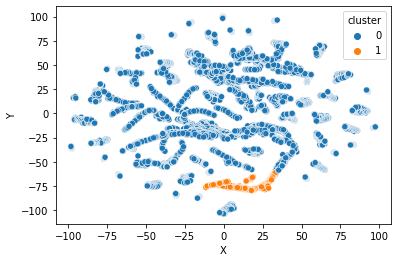

In [132]:
sns.scatterplot(x="X", y="Y",
              data=canada_tsne,
              hue='cluster',
              legend="full")

## Cluster = 0 Means Government don't need to put shutdown
## Cluster = 1 Means Government needs to put shutdown

## splitting data into train, validation and test  data set
### train = 60%
### validation = 20%
### test = 20%

In [133]:
X_train, X_test, y_train, y_test = train_test_split(canada, labels,
    test_size=0.2, shuffle = True, random_state = 8)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, 
    test_size=0.25, random_state= 8)

In [134]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(5352, 7)
(5352,)
(1785, 7)
(1785,)
(1785, 7)
(1785,)
